In [22]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from auxiliares import generate_near_from_center, a_estimator, b_estimator, add_gaussian_noise, std_noised_error, variance_a, variance_b, data_missfit, std_parameter_error, generate_L_random_sequences

<h1> (1) Generate the first synthetic test </h1>

In [2]:
N = 50 #Nro de observacoes
a = 1 #coeff linear
b = 3 #coeff angular

In [3]:
xobs = generate_near_from_center( N, 0.2 ) #posicoes de observacao

<h1> (1.2) Compute a noise-free data (exact data) by using equation 1 and the true parameters</h1>

In [4]:
ytrue = a*xobs +  b #dados "verdadeiros" sem ruido

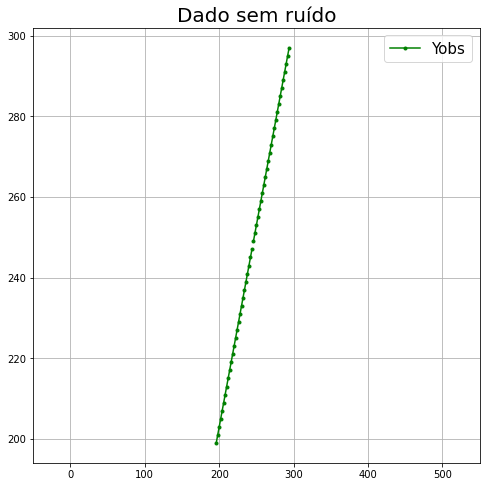

In [5]:
plt.figure( figsize = ( 8,8 ) )
plt.title( 'Dado sem ruído', fontsize = 20 )
plt.plot( xobs[:N//2], ytrue[:N//2], 'g.-', label = 'Yobs' )
plt.plot( xobs[N//2:], ytrue[N//2:], 'g.-' )
plt.legend( fontsize = 15 )
plt.xlim( -N, 11*N )
plt.grid( )
plt.show( )

<h1>(1.3) Generate the noise-corrupted data (observed data set) $y_1^o$,$y_2^o$,$y_3^o$, ..., $y_N^o$ </h1>

In [6]:
#gerando um dado com ruido
std = 0.03*np.mean( ytrue )
mean = 0 
y_noised = add_gaussian_noise( ytrue, mean, std )

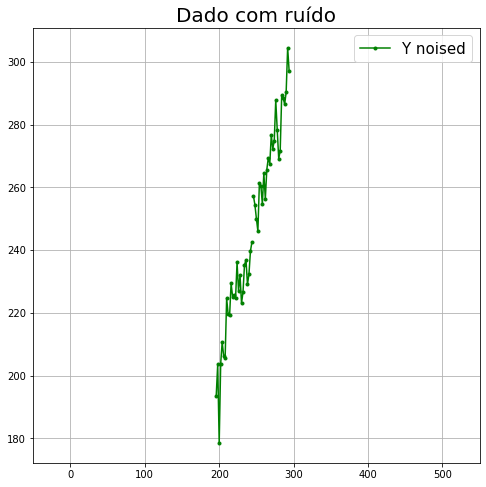

In [7]:
plt.figure( figsize = ( 8,8 ) )
plt.title( 'Dado com ruído', fontsize = 20 )
plt.plot( xobs[:N//2], y_noised[:N//2], 'g.-', label = 'Y noised' )
plt.plot( xobs[N//2:], y_noised[N//2:], 'g.-' )
plt.legend( fontsize = 15 )
plt.xlim( -N, 11*N )
plt.grid( )
plt.show( )

In [8]:
a_estimated = a_estimator( xobs, y_noised ) #obtendo a estimativa de a para o dado com ruido
b_estimated = b_estimator( xobs, y_noised, a_estimated ) #obtendo a estimativa de b para o dado com ruido

In [9]:
b_estimated

3.1825467476455014

In [10]:
y_calc = a_estimated*xobs + b_estimated #calculando o dado predito

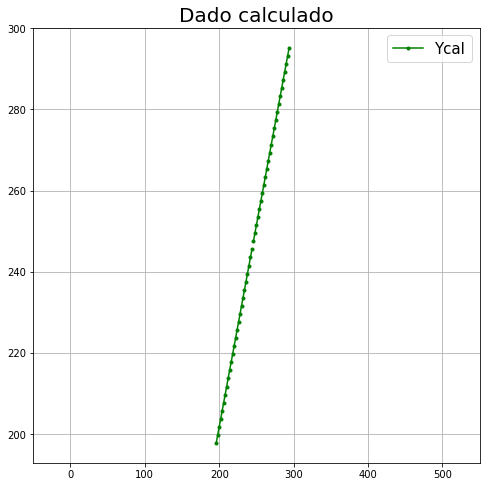

In [11]:
plt.figure( figsize = ( 8,8 ) )
plt.title( 'Dado calculado', fontsize = 20 )
plt.plot( xobs[:N//2], y_calc[:N//2], 'g.-', label = 'Ycal' )
plt.plot( xobs[N//2:], y_calc[N//2:], 'g.-' )
plt.legend( fontsize = 15 )
plt.xlim( -N, 11*N )
plt.grid( )
plt.show( )

<h1>Plotting all data in the same figure</h1>

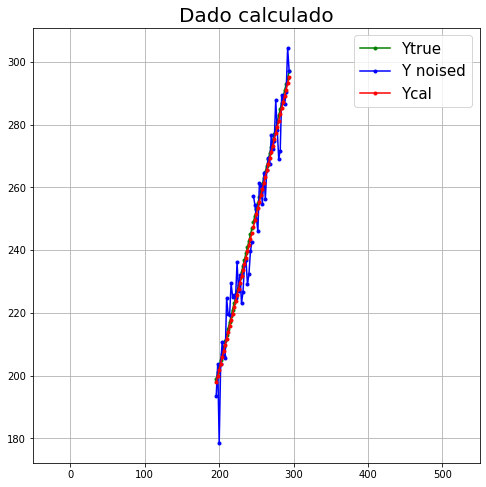

In [12]:
plt.figure( figsize = ( 8,8 ) )
plt.title( 'Dado calculado', fontsize = 20 )
plt.plot( xobs[:N//2], ytrue[:N//2], 'g.-', label = 'Ytrue' )
plt.plot( xobs[N//2:], ytrue[N//2:], 'g.-' )
plt.plot( xobs[:N//2], y_noised[:N//2], 'b.-', label = 'Y noised' )
plt.plot( xobs[N//2:], y_noised[N//2:], 'b.-' )
plt.plot( xobs[:N//2], y_calc[:N//2], 'r.-', label = 'Ycal' )
plt.plot( xobs[N//2:], y_calc[N//2:], 'r.-' )
plt.legend( fontsize = 15 )
plt.xlim( -N, 11*N )
plt.grid( )
plt.show( )

In [13]:
error_variance = std**2
var_a = variance_a( xobs, error_variance ) #calculando a varianca de a
var_b = variance_b( xobs, error_variance ) #calculando a varianca de b

<h1>Residuals (4)</h1>

In [14]:
residual = ytrue - y_calc

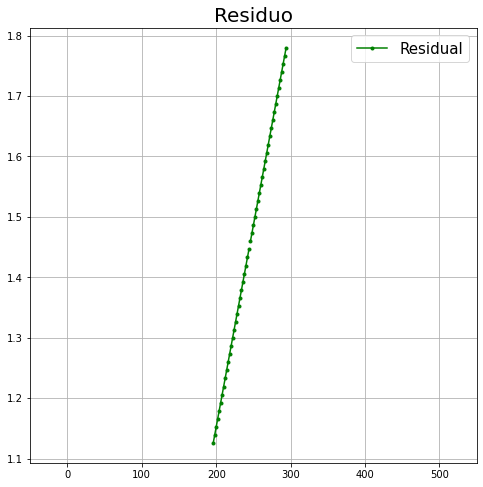

In [15]:
plt.figure( figsize = ( 8,8 ) )
plt.title( 'Residuo', fontsize = 20 )
plt.plot( xobs[:N//2], residual[:N//2], 'g.-', label = 'Residual' )
plt.plot( xobs[N//2:], residual[N//2:], 'g.-' )
plt.legend( fontsize = 15 )
plt.xlim( -N, 11*N )
plt.grid( )
plt.show( )

<h1>Data Missfit Function ( 5 )</h1>

In [16]:
missfit = data_missfit( ytrue, y_calc ) #calculando o data_missfit

<h1>Computing the estimated noise standard deviation for the noise corrupted data and comparing it with the true std</h1>

In [17]:
std_estimated = std_noised_error( y_noised, y_calc, 2 )

In [18]:
std_estimated -  std

-0.420919219152192

<h1>Checking the 2nd exercise</h1>

In [23]:
e = generate_L_random_sequences( std, N, 10 )

In [24]:
y_L_noised = e + ytrue

In [26]:
p1 = [ ]
p2 = [ ]
for i in range( 10 ):
    a_est = a_estimator( xobs, y_L_noised[ i ] )
    b_est = b_estimator( xobs, y_L_noised[ i ], a_est )
    p1.append( a_est )
    p2.append( b_est )

In [28]:
std_parameter_error( np.array( [ p1, p2 ] ) )

array([0.02777749, 7.02745985])